# Pixelwise Comparison of Geotiff Files

In [1]:
!which python

/home/fxz547/anaconda3/bin/python


In [2]:
import os, sys

import gdal
from gdalconst import *
import numpy as np

def read_raster_bands(geofile):
# replaced def readtiff(geofile):
    """ read raster bands into numpy array
    input param rasterfile: geofile
    return: a list of[ numpy ]
    """


    # Register drivers
    gdal.AllRegister()

    # Open image
    ds = gdal.Open(geofile, GA_ReadOnly)

    if ds is None:
        raise Exception('Could not open image file %s' %(geofile))
        

    # get image size
    rows = ds.RasterYSize
    cols = ds.RasterXSize
    numbands = ds.RasterCount

#     print 'rows= %s, cols= %s, number of bands = %s' %(str(rows), str(cols), str(numbands))
#     print ("********************")

    # get projection and resolution info of the raster
    proj = ds.GetProjection()

    transform = ds.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]

#     print ("Projection Info = %s"%(proj))
#     print ("xOrigin = %s,  yOrigin = %s "%(xOrigin, yOrigin))
#     print ("pixelWidth = %s,  pixelHeight = %s "%(pixelWidth, pixelHeight))
    
    # Read the data into numpy array
    numarray=[]
    for i in range(1,numbands+1):
        band =ds.GetRasterBand(i)  # the very first band is i=1
        data = band.ReadAsArray(0,0,cols,rows) #.astype('float32')
        numarray.append(data)
    
    # Once we're done, close properly the dataset
    ds = None
    
    return numarray

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as spys

def showimages(rastfile_a,rastfile_b=None):
    """ Display side-by-side two geo-raster files.
    
    """
    numalist_a = read_raster_bands(rastfile_a)
    band0a=numalist_a[0]
    
    if rastfile_b is not None:
        numalist_b = read_raster_bands(rastfile_b)
        band0b=numalist_b[0]
    
    f, ax = plt.subplots(1,1,figsize=(20,10))
    ax.imshow(band0a)
    ax.set_title('%s\n'%('Image '+ rastfile_a)) 
    #ax[0].imshow(band0a)
    #ax[1].imshow(band0a)

#if __name__ == "__main__":
#    infile = sys.argv[1]
#    nparlist = readtiff(infile)

In [ ]:
# Display an image
import glob
geotifile='/xdisk/fzhang/outdir/fei_test_svr_prediction.tif'
geotifile='/xdisk/fzhang/outdir/sirsam_potassium_randomforest_prediction.tif' #'nci_sirsam_output_randomforest.tif'


path2='/xdisk/fzhang/uncoverml_testdata'

geotifiles=glob.glob('%s/*.tif'%path2)

print (geotifiles)

In [97]:
nf=nf+1
print(nf, geotifiles[nf])
showimages(geotifiles[nf])

IndexError: list index out of range

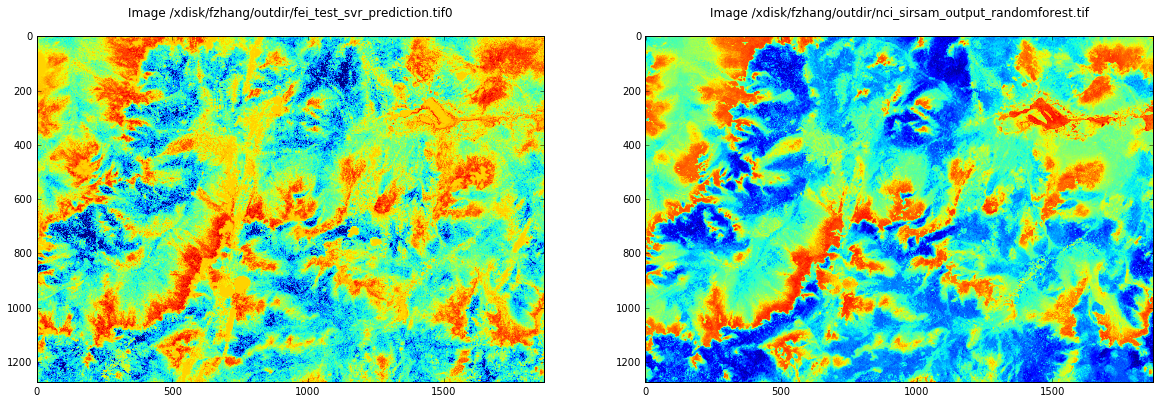

In [10]:
# Complete Rerun Wofs

tifile0='/xdisk/fzhang/outdir/fei_test_svr_prediction.tif0'
#tifile1='/xdisk/fzhang/outdir/fei_test_svr_prediction.tif'
tifile1='/xdisk/fzhang/outdir/nci_sirsam_output_randomforest.tif'

    
imga=read_raster_bands(tifile0)  # not use mpirun
imgb=read_raster_bands(tifile1)  # mpirun -n 4

f, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(imga[0]) #, cmap='Greys')
ax[0].set_title('%s\n'%('Image '+tifile0))
#plt.show()    

ax[1].imshow(imgb[0]) #, cmap='Greys')
ax[1].set_title('%s\n'%('Image '+tifile1))  

plt.show()

In [6]:
def compare_two_files_pixels(rastfile_a,rastfile_b):
    """ Compare pixel values data of two geo-raster files.
    The result could be raster pixel values equal, but metadata differ
    return True if idenitcal, False if not
    """
    numalist_a = read_raster_bands(rastfile_a)
    numalist_b = read_raster_bands(rastfile_b)

    print ("The number of bands in each raster files:")
    print (len(numalist_a) , len(numalist_b))

    if len(numalist_a) != len(numalist_b):
        return False
    
    for n in range(0,len(numalist_a) ):
        print ("The numerical sums of the band ", n, "in each raster files: ")
        print (np.sum(numalist_a[n]), np.sum(numalist_b[n]))
    
        is_all_eq = (numalist_a[n]==numalist_b[n]).all()
        
        if is_all_eq is False:
            print ("Not all are equal in the band ", n)
            
            return is_all_eq
        
    print ("Comparison of the two files pixel values result in:")
    
    return True

In [7]:

numalist_a = read_raster_bands(tifile0)
numalist_b = read_raster_bands(tifile1)

bo=compare_two_files_pixels(tifile0, tifile1)

print (bo)

The number of bands in each raster files:
1 1
The numerical sums of the band  0 in each raster files: 
7408068.33696 0.0
Comparison of the two files pixel values result in:
True


In [8]:
def compare_two_dirs_rasterfiles(dir_a, dir_b):
    """Compare two directory's tiff files, 
    if they have the same number of tif files, same named, same pixel values for every tif pair"
    """
    
    # loop over dir_a's files to compare each with dir_b's same named file
    
    import glob

    #filelist= glob.glob(self.extentdir + "/LS8*.tif") #os.listdir(self.extentdir)
    filelist= glob.glob(dir_a+ "/*.tif") #os.listdir(self.extentdir)

    for afile in filelist:
        
        fname=os.path.basename(afile)
        bfile =os.path.join(dir_b, fname)
        print ("comparing file %s and %s" %(afile, bfile))
        
        res = compare_two_files_pixels(afile,bfile)
        print (res)
        


In [9]:
compare_two_dirs_rasterfiles(WATER_EXTENTS_DIR+'/'+cell_index, WATER_EXTENTS_DIR_OLD+'/'+cell_index)


NameError: name 'WATER_EXTENTS_DIR' is not defined

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as spys
